# Numpy random Package

In This jupyter notebook we will discuss the concepts behind the numpy random package its various uses. along with this we will plot and discuss the various distrubitions availble to use in the numpy random package.

the documentation can be found at https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html


We will be importing the numpy package as np and the matplotlib.pyplot package as plt we will be using this to plot our results.

In [1]:
#importing numpy as np for simplicity.
import numpy as np
#importing matplotlib.pyplot as plt for simplicity.
import matplotlib.pyplot as plt

We will start with the numpy.random.random() method to describe some of the fundementals of the numpy random package and will explain the concepts in more depth as we go on.

The below code is calling the random() method from numpys random package where size is the number of results we wish to generate. By default the random() method will generate an array of the given size(simply returns a single random value if no size is set) of floating point numbers between 0 and 1 including zero but not including one(ie. we can have 0,0.5 or even 0.99999 but not 1). This method uses uniform distribution to generate its random numbers.

In [2]:
#size = 5 generates ten random items.
np.random.random(size = 5)

array([0.83921462, 0.8420956 , 0.33905568, 0.25972723, 0.30885563])

### Uniform Distrubution.

The uniform distribution used by numpys random() method is a symmetric probability distribution. this means that from what can be selected, in our case floats between 0 and 1, all possible values have the same probability of being selected. No bias or weight towards certain numbers. To show this we will generate 100,000 random numbers and plot the cumulative distribution function(CDF).

The CDF of a real-valued random variable R, evaluated at x, is the probability that R will take a value less than or equal to x. The expected CDF will be a straight line from (0,0) to (1,1) if all the points ploted on this graph are on this line then we have sucsessfuly shown that the random() method generates numbers from a uniform Distribution.

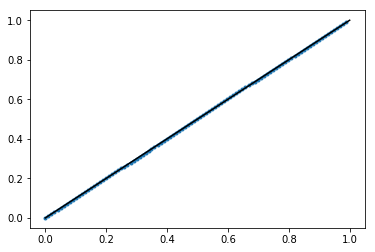

In [3]:
# Generate 100,000 random numbers and sort them.
x = np.sort(np.random.random(size=100000))

# Create CDF Y-Axis
y = np.arange(1, len(x)+1) / len(x)

# Plot CDF from random numbers (only selecting 100 points to improve legibility)
plt.plot(x[::1000], y[::1000], marker='.')

# Plot expected CDF (just a straight line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], 'k-')
plt.show()

As we can see the numbers generated follow the expected line to a high level of accuracy. thus showing that numpys random() method generates numbers between using a uniform distribution. To further show this we can plot a histogram as seen bellow and each value has more or less equal distrabution.

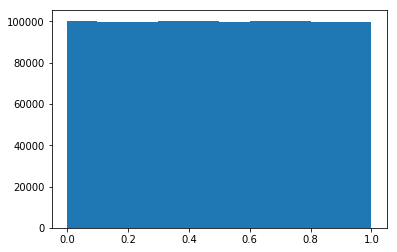

In [4]:
#The more values we use the more accurate the results in this case we have genereated one million numbers.
x = np.random.random(size=1000000)
#plots the generated numbers of an histogram.
plt.hist(x)
plt.show()

### Random generator

Computers cannot currently Generate legitimately random numbers. They instead generate psudeo-random numbers, these generated numbers are based of whats known as a seed. This "seed" is a number(or vector) used to initilise a random number generator. if this seed was always the same the order of what numbers a random number generates would also be the same. we can show this by explicitly setting this seed value.(being able to explicity set the seed provides us with a means to test our programs that use random numbers.)

In [5]:
#set the seed for the Random number generator.
np.random.seed(7)
#generate the random numbers based on this seed
np.random.random(size=5)

array([0.07630829, 0.77991879, 0.43840923, 0.72346518, 0.97798951])

In [6]:
#set the seed for the Random number generator to something else.
np.random.seed(14)
#generate the random numbers based on this seed
np.random.random(size=5)

array([0.51394334, 0.77316505, 0.87042769, 0.00804695, 0.30973593])

In [7]:
#set the seed for the Random number generator back to 7.
np.random.seed(7)
#generate the random numbers based on this seed
np.random.random(size=5)

array([0.07630829, 0.77991879, 0.43840923, 0.72346518, 0.97798951])

As we can see when the seed is set to 7 we get the five numbers seen above. we then changed the seed to another number in this case 14 but it could be any other number and we then generated 5 more numbers. These numbers are all difrent than the intial 5 numbers. We then changed the seed back to the original 7 and when the next five numbers are generated we can see that they are the same as the initial five numbers. This shows us that the numbers generated are not truely random.

We usualy use the current date time as the seed for a random number generator down to the a fraction of a second. This for all intents and purposes provides us with a unique seed thus making our psudeo-random number generator act incredibly close to an acctualy random number generator.

This is still an active area research and many people are still working on new and inovative ways to "randomly" generate numbers.



### Permutations.

The numpy.random package also has the capability to permute a sequance. A permutation relates to the act off arangeing elements of an set into a sequance or order. in our case re ordering the numpy arrays that are generated. if the set(array) is already ordered we can use permutations to reorder it.

numpy.random gives us two option with this.

The numpy.random.shuffle() method. and the numpy.random.permutation() method.

The shuffle() method takes in the aray we wish to manipulate as a parameter and uses the seed to randomly "shuffle" or reorder the array we sent in as the parameter.

In [8]:
#generates an ordered aray from 0-9 inclusive.
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
#rearanges the contents of the array x randomly.
np.random.shuffle(x)
x

array([9, 3, 4, 0, 5, 2, 6, 1, 8, 7])

as we can see it has randomly reordered the sorted aray.

this shuffle method can also be used on multi dimensional arrays although it works slightly difrent. When we use shuffle() on a multi dimension array it will onyl shuffle on the first axis.

In [10]:
#generates and ordered multi dimensional array from 0-8 inclusive with three numbers in each sub array.
x = np.arange(9).reshape((3,3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [11]:
#suffles the first axis of the multi dimensional array.
np.random.shuffle(x)
x

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

As we can see it reorders the sub arrays within the multi dimensial array but dose not reorder the contents of the sub arrays.

This shuffle() method provides usefuly functionality at a high efficencey for exaple it could be used to shuffle a multi dimensional array representing a deck of cards.

The other permutation method given to use in the numpy.random package is the numpy.random.permutation() method this works similarly to the shuffle method with a few key difrences. If passed an integer x as the input parameter it will randomly permute np.arange(x) giving us a randomly ordered aray containing the numbers 0 to x-1. if passed an array x instead of an integer it makes of copy of this array shuffles the elements in this copy and returns the copy. Copy being the key difrence between the permutation() and shuffle() methods. shuffle() shuffles the contents of an array, while permutation() creates a new copy of the aray and shuffles this new copyed array and returns it leaving the original input array untouched.

In [12]:
#generates an ordered array from 0-9 inclusive and shuffles it.
np.random.permutation(10)

array([6, 5, 1, 8, 4, 9, 2, 3, 0, 7])

In [13]:
#generate an order array from 0-9 inclusive.
x = np.arange(10)
#Creates a copy of this array and shuffles it and returns this shuffled copy.
np.random.permutation(x)

array([9, 1, 4, 2, 6, 3, 0, 5, 7, 8])

In [14]:
#prints the original array.
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As we can see even after the permutation() method has been called on the ordered array and displayed if we try to display the original array x we still get the ordered array. thus proving that it has no been shuffled and instead a copy has been made and shuffled instead.

### Simple random data

so far we have discused random number generation under to pretense that we are using np.random.random() method to generate our radnom numbers. The numpy random package provides many other options for generateing random numbers. We will now look at some of the most widely used ones.

##### rand(d0,d1...dn)
the rand() method provides us with random values in a given shape the (d0,d1...dn) parameters representing these dimentions. This method also uses the uniform distrubtion we discused earlier.



In [15]:
#generates a multi dimensial array of random values with the shape of (3,2) with the uniform distrubution.
np.random.rand(3,2)

array([[0.54848992, 0.90912837],
       [0.13316945, 0.52341258],
       [0.75040986, 0.66901324]])

##### randn(d0,d1...dn)
the randn() methods works the same way as the rand() method previously discused with one key difrence it uses the standard normal distrubution method instead of the uniform distribution method. we will discus these difrent distrubtions and what they mean in the next section of the notebook.

In [16]:
#generates a multi dimensial array of random values with the shape of (3,2) with the standard normal distribution
np.random.rand(3,2)

array([[0.46775286, 0.20484909],
       [0.49076589, 0.37238469],
       [0.47740115, 0.36589039]])

##### randint(low, high, size)
the randint() method takes in three parameters low,high and size to generate an array of random numbers using the uniform distribution.low represents the lowest integer value to be pulled from the distribution. high being the highest number to be pulled from the distribution and finaly size being the amount of numbers from these parameters to be generated. this allows us to generate an array of random values between the low and high parameter values of the given size. the high value is optional and if not given the aray generated will be between 0 and the low value-1. if the high value is specified the results will be between the low value and the high value-1. size is also an optional parameter and if not given the method will return a single random value in relation to the other parameters. 

In [17]:
#will generate numbers between 0-4 inclusive.
np.random.randint(5,size=10)

array([3, 0, 4, 0, 4, 3, 1, 3, 3, 3])

In [18]:
#will generate numbers between 2-5 inclusive.
np.random.randint(2,6,size=10)

array([3, 5, 5, 2, 5, 3, 5, 4, 3, 3])

the size paremeter can also be given as an array shape and as such will generate a multi dimensional array withe the given parameters.

In [19]:
np.random.randint(2,6,size=(3,5))

array([[3, 3, 3, 5, 5],
       [4, 5, 4, 4, 3],
       [5, 5, 5, 4, 5]])

##### choice(a,size,replace,p)
the choice() method generates a random sample from a given 1 diimensional array a. this allows us to input an array of choices and randomly select a single value from this array or to to generate a new array of values based on random choices from the input array. the parameter a is the input array we wish to randomly select from. if this parameter is instead an integer x the array we select from is np.arange(x). the size parameter is the size of the returned array we want if left out we instead recive a single value from the possible choices.the boolean parameter replace defines weather when selecting from the given array we replace the value taken. For example if we set replace to false and we have an ordered aray from 0 to 9 and the first number selected from this array is 0 the possible choices for the next value are from 1-9 as we have not replaced the value 0 by default this parameter is set to true. The parameter p is the probability of each value in a of being selected if not given the method will use the unifor distribution.

In [20]:
#will generate an array of 10 values between 0-3 inclusive.
np.random.choice(4,10)

array([0, 0, 1, 3, 1, 1, 0, 3, 2, 2])

In [21]:
#will generate an array of 10 values between 0-19 inclusive with no repeates
np.random.choice(20,10,replace=False)

array([ 9,  0,  1, 14, 19, 17,  5, 18, 12,  2])

This funtionality is widely used in many areas for example in gaming we could have use this functionaility so that when the player opens a chest they get given a random item from an array of possible items.

### Distributions

So far we have predominatly been looking at random number generation using the uniform distribution as stated above this method gives equal probability to all possible choices to be chosen but there are far more distribution methods availble to us.

In the numpy random package their are 35 possible disributions to select from. We will discuss five distributions in this section and how they difer from eachother aswell as why and when they may be used. the rest of the distributions can be found in the numpy.random documentation under the Distributions heading. 

https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html

##### 1. Standard normal distribution.
the standard normal distribution often called the bell curve is a distribution with a higher probability of a value being selected the closer it is to the predefined centre of the distribution with the likely hood of a value being selected decreasing the further it is from this center or mean value. 

this distribution is most commonly implement in the numpy random package via the numpy.random.normal() method.

numpy.random.normal(loc=0.0, scale=1.0, size=None)

The parameter loc refers to the center of the distribution or the mean value (the most probable choice)

The parameter scale refers to the standard diviation or "width" of the distribution.

The paramater size refers to the number of generate values we desire.

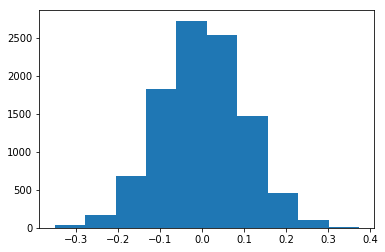

In [22]:
#mean value
mu = 0
#stanard deviation
sigma = 0.1
#generates an array of 10,000 values with the mean and standard deviations we defined above.
array = np.random.normal(mu,sigma,10000)
#plots this array of 10000 points on a histogram.
plt.hist(array)
plt.show()

As we can see the center point we selected was 0.0 and the histagram shows us that the closer the value was to this center point the more likely it was to be selected out of our set of 10,000 choices.

This distribution differs greatly from the uniform distribution we looked at earlyer where all values had an equal chance of being selected.

A good example of a bell curve is the combined value when rolling two dice. posible values are between 2 and 12 inclusive. 7 is the most likely value as it has the most possible cominations. the next being 6 and 8. Then 5 and 9. then 4 and 10 then 3 and 11 and finaly 2 and 12.

02 = (1,1)                               |possible choices = 1
03 = (1,2) (2,1)                         |possible choices = 2
04 = (1,3) (2,2) (3,1)                   |possible choices = 3
05 = (1,4) (2,3) (3,2) (4,1)             |possible choices = 4
06 = (1,5) (2,4) (3,3) (4,2) (5,1)       |possible choices = 5
07 = (1,6) (2,5) (3,4) (4,3) (5,2) (6,1) |possible choices = 6
08 = (2,6) (3,5) (4,4) (5,3) (6,2)       |possible choices = 5
09 = (3,6) (4,5) (5,4) (6,3)             |possible choices = 4
10 = (4,6) (5,5) (6,4)                   |possible choices = 3
11 = (5,6) (6,5)                         |possible choices = 2
12 = (6,6)                               |possible choices = 1

as we can see from all the possible compinations of two dice rolls it perfectly represents a standard normal distribution with the probability being the highest in the center and gradualy decreseing the further we deviate from this centre. We can show this on a histogram with the following code.

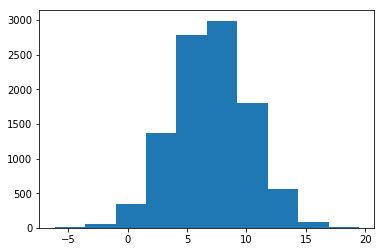

In [23]:
#mean value being the most common roll of 7
mu = 7
#stanard deviation calculated by taking the mean value from all possible values and squareing them
#finding the mean value of these new values and getting the square root of this new mean value.
sigma = 3.16227766017
#generates an array of 10,000 values with the mean and standard deviations we defined above.
array = np.random.normal(mu,sigma,10000)
#plots this array of 10000 points on a histogram.
plt.hist(array)
plt.show()

as we can see it produces a bell curve shapped graph showing us that these dice rolls also follow the standard normal distribution.

### 2. Binomial distribution.

Binomial distribution is used to model the probability of obtaining one of two outcomes, a certain number of times, out of fixed number of trials of a discrete random event. one of the easiest real world examples would be the probability of a series of coin flips. lets say we flip a coin 10 times and want to know the probability of getting seven heads. we can use the binomial distribution to calculate this.

In [24]:
#number of coin flips per trial.
n = 10
#probability of each flip(heads or tails being 50/50 or 0.5)
p= 0.5  
#number of times we wish the trial to be done
times = 10000
#number of heads per n coinflips we want to calculate the probability of
h = 7
#gets the sum the results from the binomial distribution where the number of sucsesses equals h and divides it
#by the number of times the trial was run to the probability of that that outcome.  
s = sum(np.random.binomial(n, p,times)==h)/times
s

0.1172

the default value of h above is seven this gives us the probability of getting seven heads when we flip a coin 10 times. we can change this h value to any number between 0 and n inclusive and we will be given the probability of getting heads that many times in n coin flips.

Binomial distributions are used when the result is either a sucsess or a fail and we know the probability of an individual sucsess. it allows us to calculate the probability of obtaining a perticular outcome a certain amount of times within a predefind number of trys.

we can visualise this distribution on a histogram as follows. 

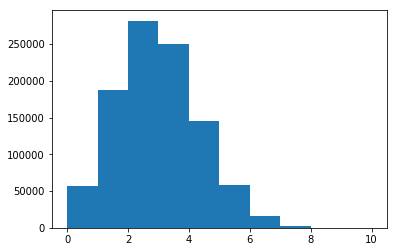

In [25]:
#number of times the event will occur per trial
n = 10
#probability of each event being a sucsess (in this case)
p= 0.25  
#number of times we wish the trial to be done
times = 1000000
#in this case the event will be atempted 10 times with a 25% change of sucsess per trial with 1 million trials.
x = np.random.binomial(n,p,times)
#plotinf this on the histogram shows us how many times in the million atempts each outcome occured.
plt.hist(x)
plt.show()

specificly in relation to numpy.random which has the primary purpose of generating random numbers the binomial() method returns an array with all the given outcomes of the trials. this results in us having an array of randomly generated numbers with a binomial distrubution.

In [26]:
# 10 events per trial with a 50% chance of sucsess with 20 trials
np.random.binomial(10,0.5,20)
#the array that is returned to us contains values witch represent the number of sucsesses from each of the 20 trials.

array([3, 5, 3, 4, 4, 6, 2, 4, 4, 5, 5, 3, 7, 6, 5, 6, 6, 6, 5, 6])